In [1]:
import tensorflow as tf 
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

2022-04-14 17:35:01.787676: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Found GPU at: /device:GPU:0


2022-04-14 17:35:02.801019: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-14 17:35:02.802607: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-14 17:35:02.878588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 17:35:02.878854: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.7845GHz coreCount: 15 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 2

In [2]:
import pandas as pd 
df_btc = pd.read_csv('CSVFiles/Bitcoin_tweets.csv')
# https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets 

/tmp/ipykernel_24666/3405830821.py:2: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_btc = pd.read_csv('CSVFiles/Bitcoin_tweets.csv')


In [3]:
df_btc = df_btc.drop({'user_location','user_description','user_created','user_friends','user_favourites',
             'hashtags','source','is_retweet'}, axis=1)

In [4]:
cols = ["Open-Time", "Open", "High", "Low", "Close", "Volume", "Close-Time", "Quote-Asset-Volume",
        "Number-Of-Trades", "Taker-Buy-Base-Asset-Volume", "Taker-Buy-Quote-Asset-Volume", "Ignore"]

df_btcusd_bull = pd.read_csv('CSVFiles/BTCUSDT-1m-2021-10.csv', names=cols)
df_btcusd_bear1 = pd.read_csv('CSVFiles/BTCUSDT-1m-2021-11.csv', names=cols)
df_btcusd_bear2 = pd.read_csv('CSVFiles/BTCUSDT-1m-2021-12.csv', names=cols)
df_btcusd_bear = pd.concat([df_btcusd_bear1, df_btcusd_bear2], ignore_index=True)

df_btcusd_bull = df_btcusd_bull.drop({"Open", "High", "Low", "Volume", "Close-Time", "Quote-Asset-Volume",
        "Number-Of-Trades", "Taker-Buy-Base-Asset-Volume", "Taker-Buy-Quote-Asset-Volume", "Ignore"},axis=1)
df_btcusd_bear = df_btcusd_bear.drop({"Open", "High", "Low", "Volume", "Close-Time", "Quote-Asset-Volume",
        "Number-Of-Trades", "Taker-Buy-Base-Asset-Volume", "Taker-Buy-Quote-Asset-Volume", "Ignore"},axis=1)

In [5]:
from datetime import datetime 

btcusd_bull_times = [] 

for index, row in df_btcusd_bull.iterrows(): 
    ts = row['Open-Time']/1000
    btcusd_bull_times.append(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

btcusd_bear_times = []

for index, row in df_btcusd_bear.iterrows(): 
    ts = row['Open-Time']/1000
    btcusd_bear_times.append(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

In [6]:
df_btcusd_bull['Date-And-Time'] = btcusd_bull_times

In [7]:
df_btcusd_bear['Date-And-Time'] = btcusd_bear_times

<AxesSubplot:xlabel='Date-And-Time'>

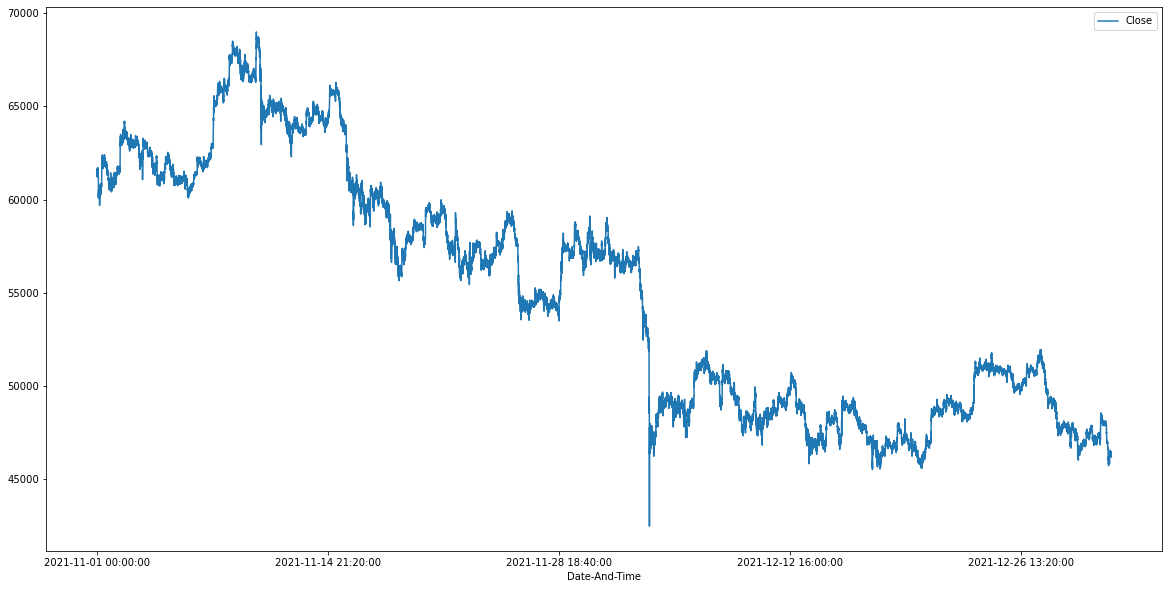

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

df_btcusd_bear.plot(x="Date-And-Time", y="Close", kind="line", figsize=(20,10))
# sns.lineplot(x=df_btcusd_bear['Date-And-Time'], y=df_btcusd_bear['Close'])

<AxesSubplot:xlabel='Date-And-Time'>

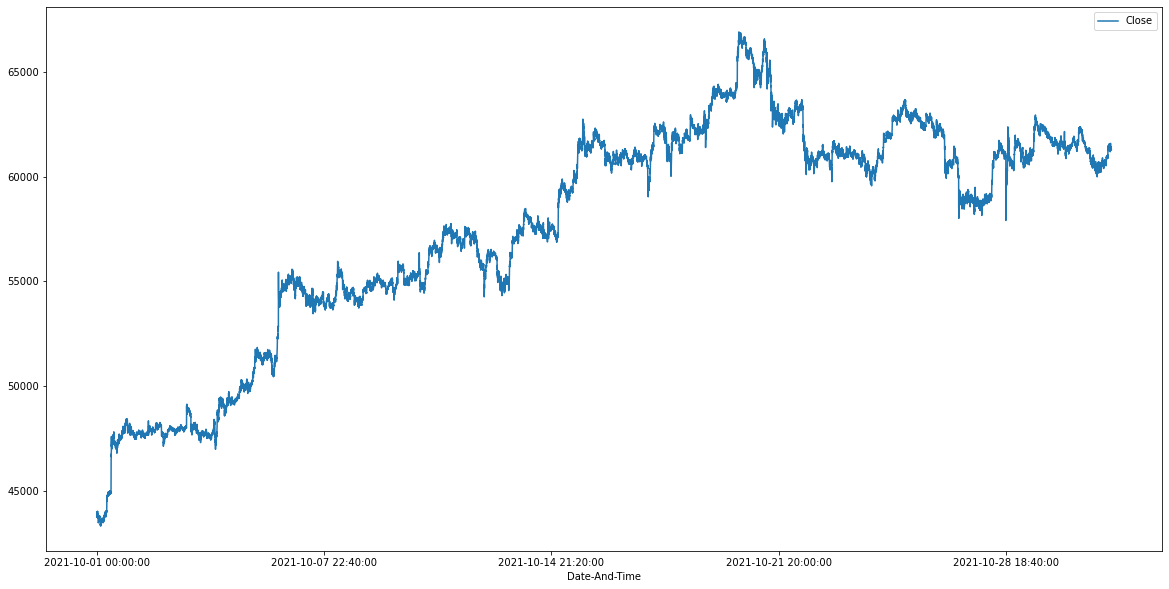

In [9]:
df_btcusd_bull.plot(x="Date-And-Time", y="Close", kind="line", figsize=(20,10))

In [10]:
df_btc_bull = df_btc[1232802:1584601]
df_btc_bull.to_csv('CSVFiles/BitcoinTweetsBullRun.csv')

In [11]:
df_btc_bear = df_btc[1584602:1999534]
df_btc_bear.to_csv('CSVFiles/BitcoinTweetsBearRun.csv')